In [45]:
import os


files = os.listdir('../videos')
files = [f for f in files if f.endswith('.csv')]
files

['2024-04-23.csv',
 '2024-04-22.csv',
 '2024-04-20.csv',
 '2024-04-21.csv',
 '2024-06-08.csv',
 '2024-04-19.csv',
 '2024-04-25.csv',
 '2024-04-24.csv',
 '2024-04-30.csv',
 '2024-04-18.csv',
 '2024-06-09.csv',
 '2024-04-26.csv',
 'all_videos.csv',
 '2024-04-27.csv',
 '2024-05-28.csv',
 '2024-05-14.csv',
 '2024-07-11.csv',
 '2024-07-05.csv',
 '2024-07-04.csv',
 '2024-07-10.csv',
 '2024-05-01.csv',
 '2024-05-15.csv',
 '2024-05-29.csv',
 '2024-05-03.csv',
 '2024-05-17.csv',
 '2024-07-06.csv',
 '2024-07-12.csv',
 '2024-07-13.csv',
 '2024-07-07.csv',
 '2024-05-16.csv',
 '2024-05-02.csv',
 '2024-05-06.csv',
 '2024-05-12.csv',
 '2024-07-03.csv',
 '2024-07-17.csv',
 '2024-07-16.csv',
 '2024-05-13.csv',
 '2024-05-07.csv',
 '2024-05-11.csv',
 '2024-05-05.csv',
 '2024-07-14.csv',
 '2024-07-15.csv',
 '2024-05-04.csv',
 '2024-05-10.csv',
 '2024-05-09.csv',
 '2024-05-21.csv',
 '2024-07-18.csv',
 '2024-05-20.csv',
 '2024-05-08.csv',
 '2024-05-22.csv',
 '2024-05-23.csv',
 '2024-05-27.csv',
 '2024-05-26

In [46]:
# Combine all the csv files into one
import pandas as pd
HISTORY = True
if HISTORY:
    df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
    files_history = os.listdir('../videos/history')
    files_history = [f for f in files_history if f.endswith('.csv')]
    df_history = pd.concat([pd.read_csv('../videos/history/' + f) for f in files_history])
    files_history = os.listdir('../videos/history2')
    files_history = [f for f in files_history if f.endswith('.csv')]
    df_history = pd.concat([pd.read_csv('../videos/history2/' + f) for f in files_history])
    df = pd.concat([df, df_history])
    df = df.drop_duplicates()
else:
    df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
    df = df.drop_duplicates()
df.to_csv('../videos/all_videos.csv', index=False)

In [47]:
# Load the combined csv file
df = pd.read_csv('../videos/all_videos.csv')

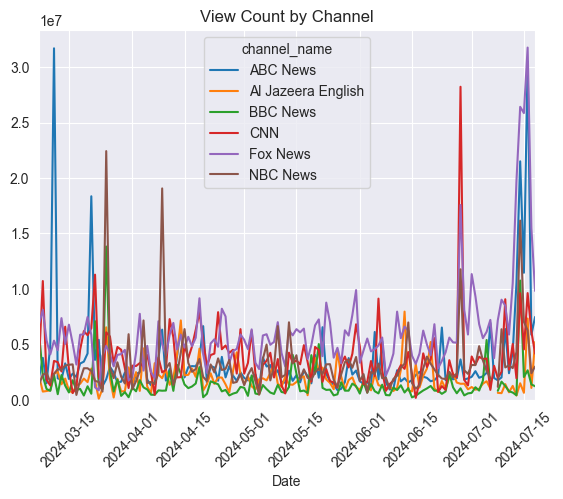

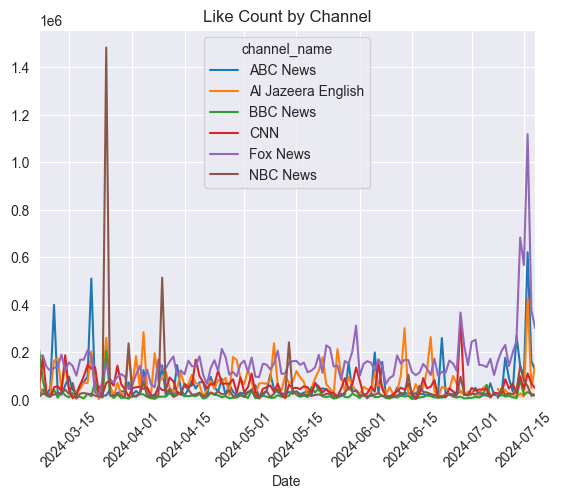

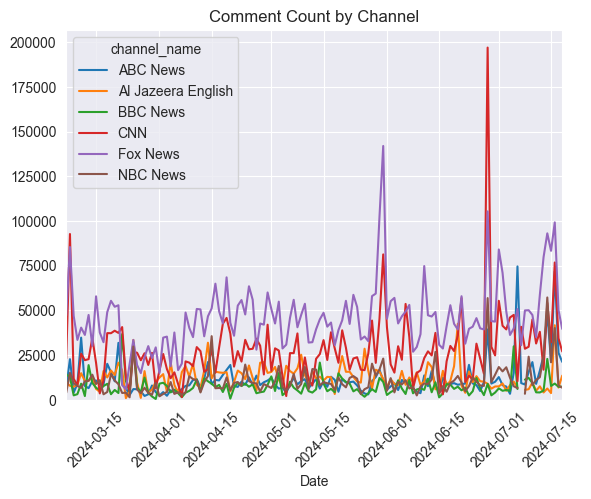

In [48]:
# Plot ViewCount and LikeCount for each channel by day
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['published_at']).dt.date
df['view_count'] = df['view_count'].fillna(0).astype(int)
df['like_count'] = df['like_count'].fillna(0).astype(int)
df['comment_count'] = df['comment_count'].fillna(0).astype(int)

df.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().plot()
plt.title('View Count by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

df.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().plot()
plt.title('Like Count by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

df.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().plot()
plt.title('Comment Count by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

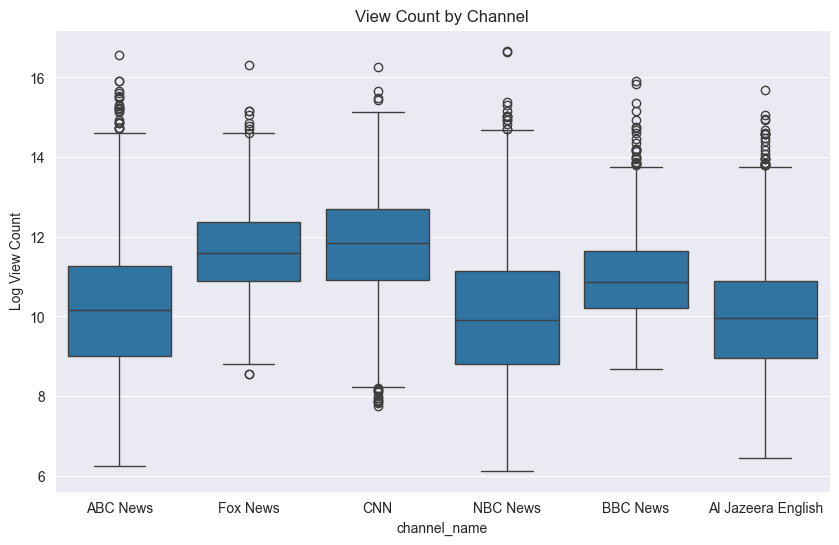

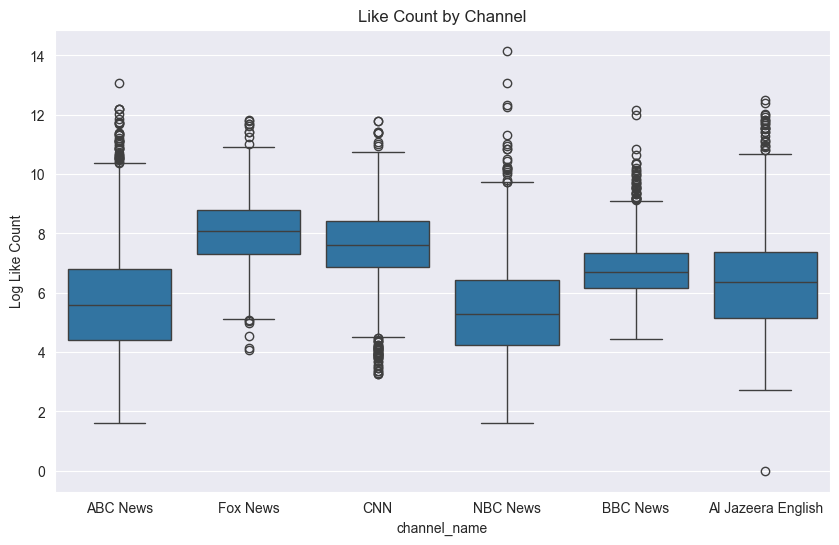

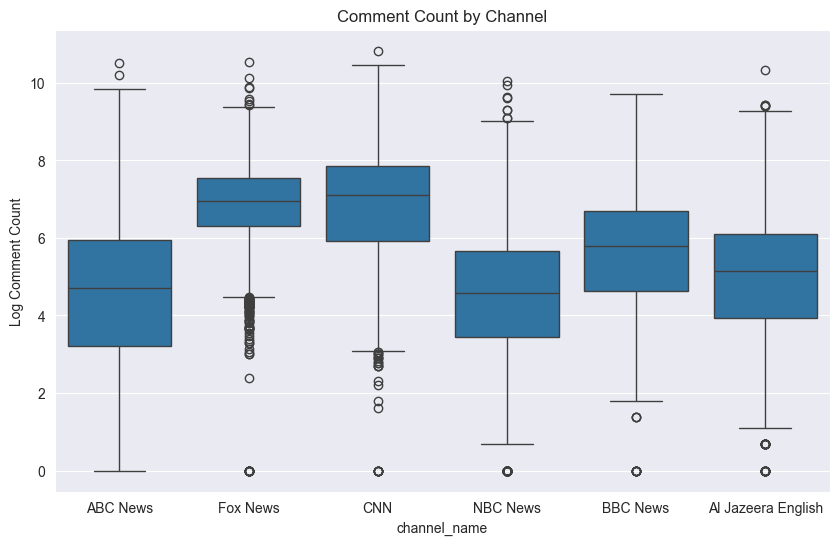

In [49]:
# box plot for view count, like count, and comment count
import seaborn as sns
import numpy as np

# use log scale for better visualization
df['view_count_log'] = df['view_count'].apply(lambda x: 0 if x == 0 else np.log(x))
df['like_count_log'] = df['like_count'].apply(lambda x: 0 if x == 0 else np.log(x))
df['comment_count_log'] = df['comment_count'].apply(lambda x: 0 if x == 0 else np.log(x))

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='view_count_log', data=df)
plt.title('View Count by Channel')
plt.ylabel('Log View Count')    
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='like_count_log', data=df)
plt.title('Like Count by Channel')
plt.ylabel('Log Like Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='comment_count_log', data=df)
plt.title('Comment Count by Channel')
plt.ylabel('Log Comment Count')
plt.show()

In [50]:
political_words = ['trump', 'biden', 'democrat', 'republican']
political_df = df[df['video_title'].str.contains('|'.join(political_words), case=False)]

<Figure size 1000x600 with 0 Axes>

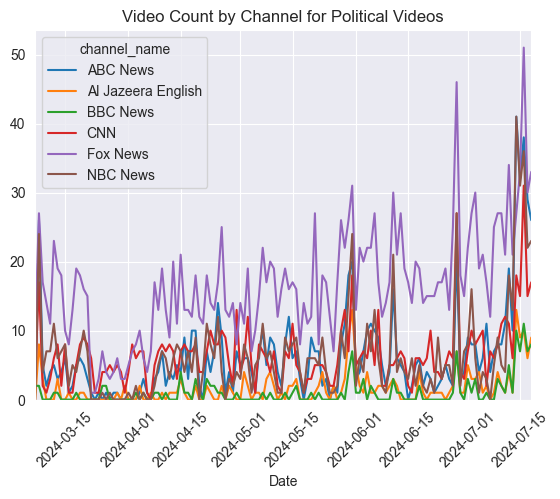

<Figure size 1000x600 with 0 Axes>

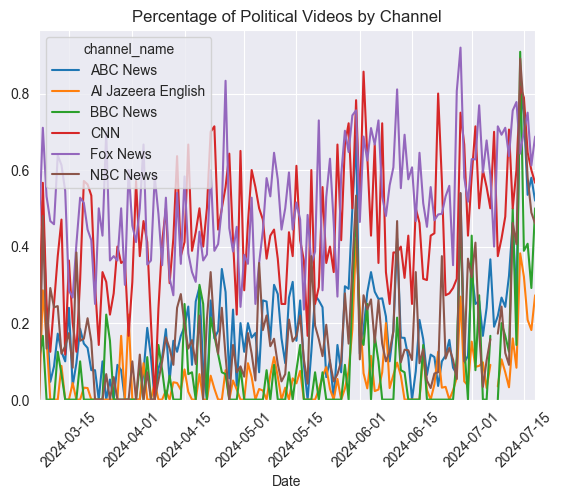

<Figure size 1000x600 with 0 Axes>

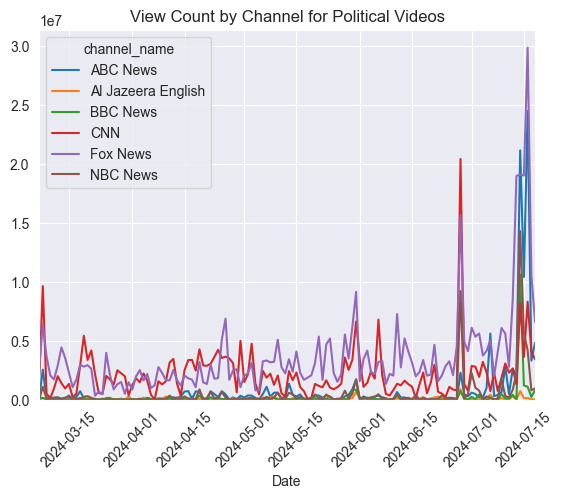

<Figure size 1000x600 with 0 Axes>

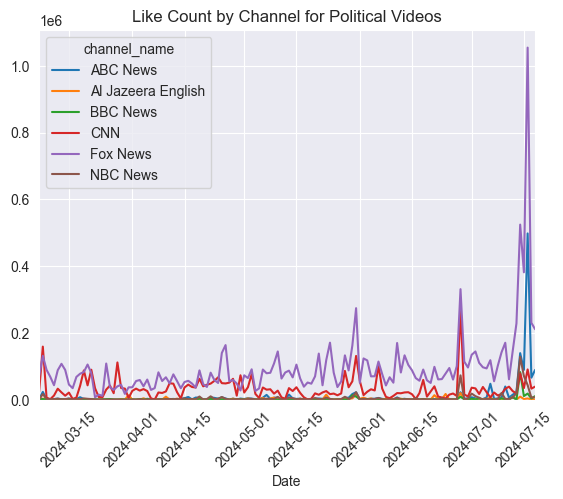

<Figure size 1000x600 with 0 Axes>

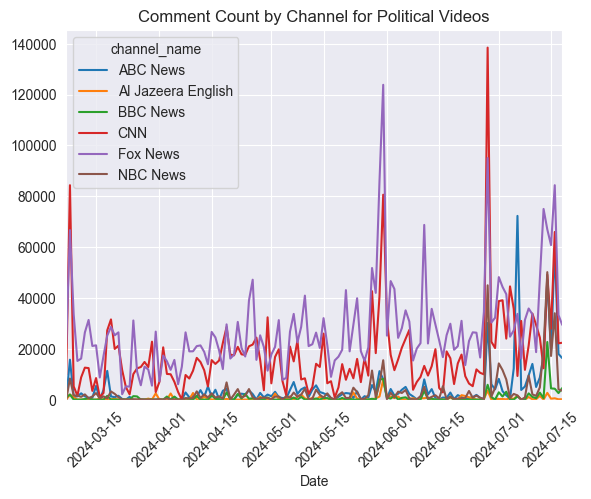

In [51]:
# video raw count
plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0).plot()
plt.title('Video Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

# percentage of political videos to the total videos
plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0).div(df.groupby(['Date', 'channel_name'])['video_id'].count().unstack().fillna(0)).plot()
plt.title('Percentage of Political Videos by Channel')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().fillna(0).plot()
plt.title('View Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().fillna(0).plot()
plt.title('Like Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

plt.figure(figsize=(10, 6))
political_df.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().fillna(0).plot()
plt.title('Comment Count by Channel for Political Videos')
plt.xticks(rotation=45)
plt.ylim(0)
plt.xlim(df['Date'].min(), df['Date'].max())
plt.show()

/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_37418/2306398103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_df['view_count_log'] = political_df['view_count'].apply(lambda x: 0 if x == 0 else np.log(x))
/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_37418/2306398103.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_df['like_count_log'] = political_df['like_count'].apply(lambda x: 0 if x == 0 else np.log(x))
/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T

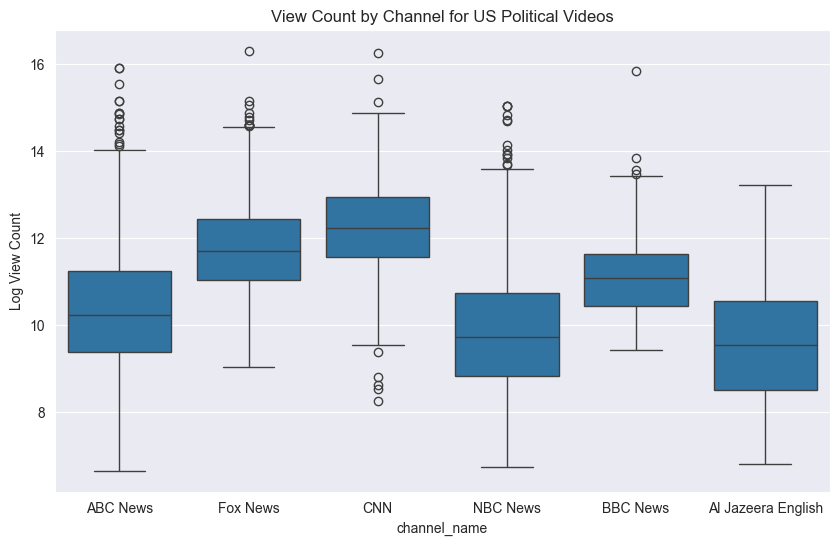

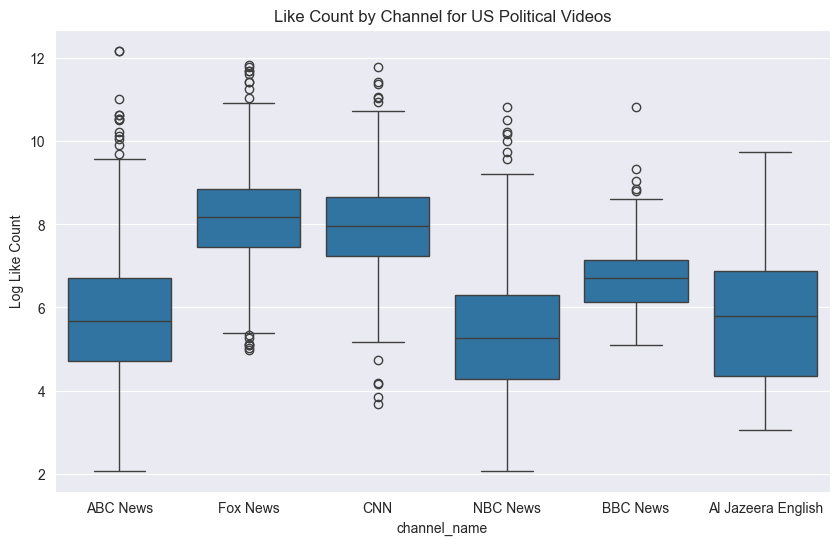

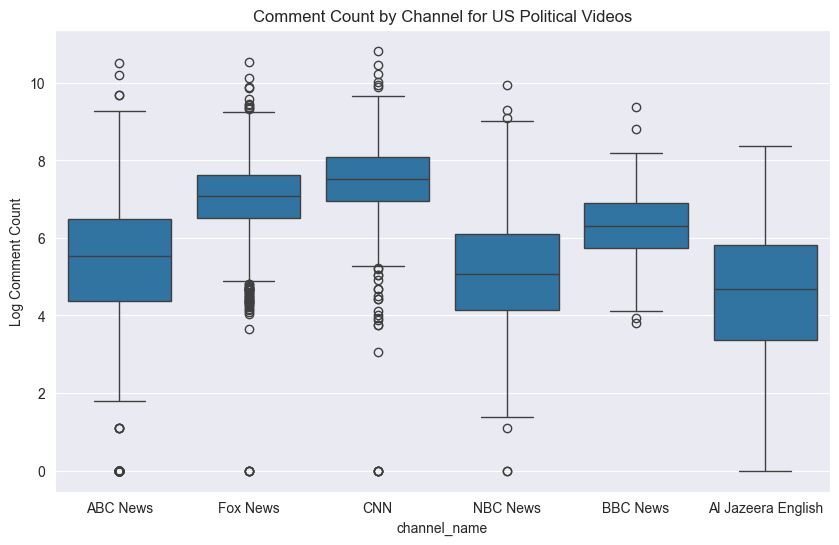

In [52]:
# box plot for view count, like count, and comment count
import seaborn as sns
import numpy as np

# use log scale for better visualization
political_df['view_count_log'] = political_df['view_count'].apply(lambda x: 0 if x == 0 else np.log(x))
political_df['like_count_log'] = political_df['like_count'].apply(lambda x: 0 if x == 0 else np.log(x))
political_df['comment_count_log'] = political_df['comment_count'].apply(lambda x: 0 if x == 0 else np.log(x))

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='view_count_log', data=political_df)
plt.title('View Count by Channel for US Political Videos')
plt.ylabel('Log View Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='like_count_log', data=political_df)
plt.title('Like Count by Channel for US Political Videos')
plt.ylabel('Log Like Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='comment_count_log', data=political_df)
plt.title('Comment Count by Channel for US Political Videos')
plt.ylabel('Log Comment Count')
plt.show()

In [53]:
import matplotlib.pyplot as plt

# CNN and Fox News
cnn_fox = df[df['channel_name'].isin(['CNN', 'Fox News'])]
cnn_fox

,channel_name,video_title,published_at,video_id,view_count,like_count,comment_count,Date,view_count_log,like_count_log,comment_count_log
25,Fox News,‘The Five’: Kamala receives ‘brutal’ feedback ...,2024-04-23T23:30:09Z,ftU67hCYlvc,601874,10857,2533,2024-04-23,13.307803,9.292565,7.837160
26,Fox News,Tyrus: We have a terrorist group marching in N...,2024-04-23T22:45:00Z,KisbbLuB-WQ,409073,18953,5424,2024-04-23,12.921649,9.849718,8.598589
27,Fox News,‘The Five’: Trump clashes with prosecutors ove...,2024-04-23T22:00:14Z,QHh9B2VXO60,232233,6089,2479,2024-04-23,12.355496,8.714239,7.815611
28,Fox News,Biden ripped over cannibal claim: &#39;A plagi...,2024-04-23T21:15:00Z,a82pVg2ndP4,81678,2633,1259,2024-04-23,11.310540,7.875879,7.138073
29,Fox News,Trump: The gag order is &#39;totally unconstit...,2024-04-23T20:26:41Z,Rl14by2FRGw,57359,1395,1878,2024-04-23,10.957085,7.240650,7.537963
...,...,...,...,...,...,...,...,...,...,...,...
19438,CNN,Trump ally speaks at RNC right after leaving p...,2024-07-18T01:10:38Z,ztB4AHxYZj0,28562,540,137,2024-07-18,10.259832,6.291569,4.919981
19439,CNN,Biden &#39;receptive&#39; in discussions about...,2024-07-18T01:00:09Z,DLLsUcMJCmE,161831,1571,1336,2024-07-18,11.994308,7.359468,7.197435
19440,CNN,Trump tariffs take over Republican establishment,2024-07-18T00:49:02Z,4sXVOpVxFNI,24765,510,156,2024-07-18,10.117187,6.234411,5.049856
19441,CNN,Peter Navarro speaks at RNC hours after prison...,2024-07-18T00:30:02Z,41J3pIv2DKQ,30534,515,527,2024-07-18,10.326596,6.244167,6.267201


In [69]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio

# Assuming cnn_fox and df are already defined as pandas DataFrame objects

# Group data and calculate view counts per channel per date
data = cnn_fox.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().fillna(0)

# Calculate the 98th percentile for the view counts across all data
quantile = data.values.flatten()
quantile = quantile[quantile > 0]  # Remove zeros if necessary
percentile = np.percentile(quantile, 98)

# Create an interactive plot for view counts
fig = go.Figure()

for channel in data.columns:
    fig.add_trace(go.Scatter(x=data.index, y=data[channel], mode='lines', name=channel))

fig.add_hline(y=percentile, line=dict(color='red', dash='dash'), annotation_text=f'98th Percentile ({percentile:.2f})', annotation_position='top left')
fig.update_layout(
    title='View Count by Channel for CNN and Fox News',
    xaxis_title='Date',
    yaxis_title='View Count',
    hovermode='x unified',
    xaxis=dict(type='category', tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=800,  # Set the width of the plot
    height=500  # Set the height of the plot
)
fig.show()

# Print the dates exceeding the 98th percentile
print("Dates exceeding the 98th percentile for CNN")
print(data[data['CNN'] > percentile])
print("Dates exceeding the 98th percentile for Fox News")
print(data[data['Fox News'] > percentile])

# Interactive plot for like counts
like_data = cnn_fox.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().fillna(0)
fig_likes = go.Figure()

for channel in like_data.columns:
    fig_likes.add_trace(go.Scatter(x=like_data.index, y=like_data[channel], mode='lines', name=channel))

fig_likes.update_layout(
    title='Like Count by Channel for CNN and Fox News',
    xaxis_title='Date',
    yaxis_title='Like Count',
    hovermode='x unified',
    xaxis=dict(type='category', tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=800,
    height=500
)
fig_likes.show()

# Interactive plot for comment counts
comment_data = cnn_fox.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().fillna(0)
fig_comments = go.Figure()

for channel in comment_data.columns:
    fig_comments.add_trace(go.Scatter(x=comment_data.index, y=comment_data[channel], mode='lines', name=channel))

fig_comments.update_layout(
    title='Comment Count by Channel for CNN and Fox News',
    xaxis_title='Date',
    yaxis_title='Comment Count',
    hovermode='x unified',
    xaxis=dict(type='category', tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=800,
    height=500
)
fig_comments.show()

Dates exceeding the 98th percentile for CNN
channel_name       CNN  Fox News
Date                            
2024-06-28    28226595  17562402
Dates exceeding the 98th percentile for Fox News
channel_name       CNN  Fox News
Date                            
2024-06-28    28226595  17562402
2024-07-13     1927858  19701172
2024-07-14     9601638  26416683
2024-07-15     4526728  25853440
2024-07-16     9611323  31762457


In [73]:
import plotly.express as px
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Calculate the descriptive statistics and find the 99th percentile for view counts
view_count_stats = cnn_fox['view_count'].describe()
view_count_99th = cnn_fox['view_count'].quantile(0.99)

# Filter the dataset to find videos with view counts in the top 1%
outliers = cnn_fox[cnn_fox['view_count'] > view_count_99th]

# Print summary statistics and details about the outliers
print(f"View count statistics:\n{view_count_stats}")
print(f"\n99th percentile view count: {view_count_99th}")
print(f"\nVideos with view counts above the 99th percentile:")
print(outliers[['Date', 'channel_name', 'video_title', 'view_count']])

# Sort the data by date to ensure chronological order
outliers = outliers.sort_values(by='Date')

# Create an interactive plot to show these outliers
fig = px.scatter(outliers, 
                 x='Date', 
                 y='view_count', 
                 color='channel_name', 
                 size='view_count', 
                 hover_data=['video_title', 'view_count'],
                 title='Top 1% Most Viewed Videos on CNN and Fox News',
                 labels={'view_count': 'View Count', 'channel_name': 'Channel'})

# Update layout for better readability and chronological ordering
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='View Count',
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=1000,  # Adjust the width of the plot
    height=600   # Adjust the height of the plot
)

# Show the plot
fig.show()


View count statistics:
count    6.040000e+03
mean     2.199688e+05
std      3.780614e+05
min      2.311000e+03
25%      5.414450e+04
50%      1.145975e+05
75%      2.615765e+05
max      1.210359e+07
Name: view_count, dtype: float64

99th percentile view count: 1475535.6399999992

Videos with view counts above the 99th percentile:
            Date channel_name  \
379   2024-04-20          CNN   
468   2024-04-21          CNN   
685   2024-04-19     Fox News   
701   2024-04-19          CNN   
1058  2024-04-24          CNN   
...          ...          ...   
18888 2024-07-17          CNN   
19073 2024-07-16     Fox News   
19078 2024-07-16     Fox News   
19249 2024-07-16     Fox News   
19253 2024-07-16     Fox News   

                                             video_title  view_count  
379    Reporter describes moment judge told Trump to ...     1862289  
468    Hear Michael Douglas&#39; response when asked ...     2209627  
685    Israel begins retaliatory strikes on Iran: Report  

/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_37418/2326295267.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
# Initialize appearance column with default value
cnn_fox['appearance'] = -1

# Iterate over each row and update appearance column based on video title
for index, row in cnn_fox.iterrows():
    title_lower = row['video_title'].lower()
    if 'trump' in title_lower and 'biden' not in title_lower:
        cnn_fox.at[index, 'appearance'] = 0
    elif 'biden' in title_lower and 'trump' not in title_lower:
        cnn_fox.at[index, 'appearance'] = 1
    elif 'biden' in title_lower and 'trump' in title_lower:
        cnn_fox.at[index, 'appearance'] = 2

/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_37418/3238663859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnn_fox['appearance'] = -1


In [57]:
cnn_fox_political = cnn_fox[cnn_fox['appearance'] != -1]
cnn_fox_political.describe()
var = cnn_fox_political[cnn_fox_political['view_count'] > cnn_fox_political['view_count'].quantile(0.98)]

In [74]:
import plotly.express as px
import pandas as pd

# Ensure the 'Date' column is in datetime format
cnn_fox_political['Date'] = pd.to_datetime(cnn_fox_political['Date'])

# Filter the dataset to find videos with view counts in the top 2%
top_videos = cnn_fox_political[cnn_fox_political['view_count'] > cnn_fox_political['view_count'].quantile(0.98)]

# Print summary statistics and details about the top 2% most viewed videos
print(f"Videos with view counts above the 98th percentile:")
print(top_videos[['Date', 'channel_name', 'video_title', 'view_count']])

# Create an interactive plot to show these top-viewed videos
fig = px.scatter(top_videos, 
                 x='Date', 
                 y='view_count', 
                 color='channel_name', 
                 size='view_count', 
                 hover_data=['video_title', 'view_count'],
                 title='Top 2% Most Viewed Videos about Trump or Biden on CNN and Fox News',
                 labels={'view_count': 'View Count', 'channel_name': 'Channel'},
                 template='plotly_white')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='View Count',
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    width=1000,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Show the plot
fig.show()


Videos with view counts above the 98th percentile:
            Date channel_name  \
379   2024-04-20          CNN   
468   2024-04-21          CNN   
856   2024-04-25     Fox News   
1252  2024-04-30          CNN   
1879  2024-04-16          CNN   
2068  2024-04-17          CNN   
2389  2024-04-27          CNN   
2640  2024-04-28          CNN   
5361  2024-05-10     Fox News   
7273  2024-03-08          CNN   
7929  2024-03-19          CNN   
7931  2024-03-19          CNN   
8086  2024-03-18          CNN   
8241  2024-03-28          CNN   
9376  2024-05-23     Fox News   
9564  2024-05-24     Fox News   
10737 2024-04-11          CNN   
11067 2024-04-12     Fox News   
11503 2024-05-28          CNN   
12004 2024-05-31     Fox News   
12050 2024-05-31          CNN   
12201 2024-06-01          CNN   
12412 2024-06-03     Fox News   
12753 2024-06-06          CNN   
16057 2024-06-21     Fox News   
16094 2024-06-21          CNN   
16655 2024-07-01          CNN   
16877 2024-06-28     Fox 

/var/folders/_0/9lcpl6ds451bxrqdll83hcbc0000gn/T/ipykernel_37418/3038552722.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



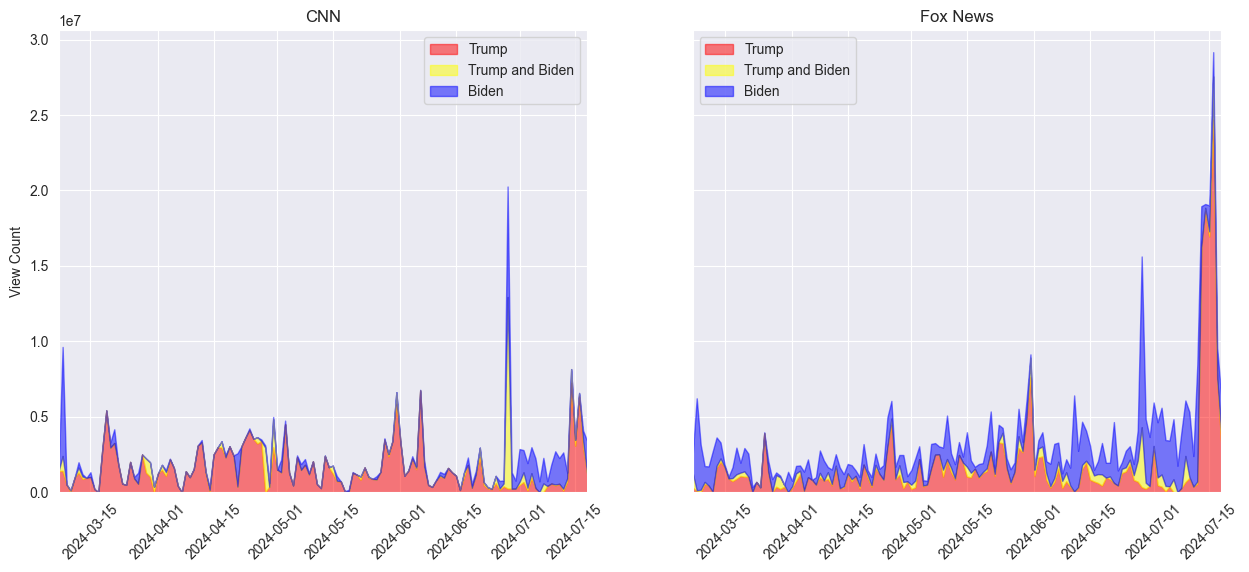

In [59]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('View Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

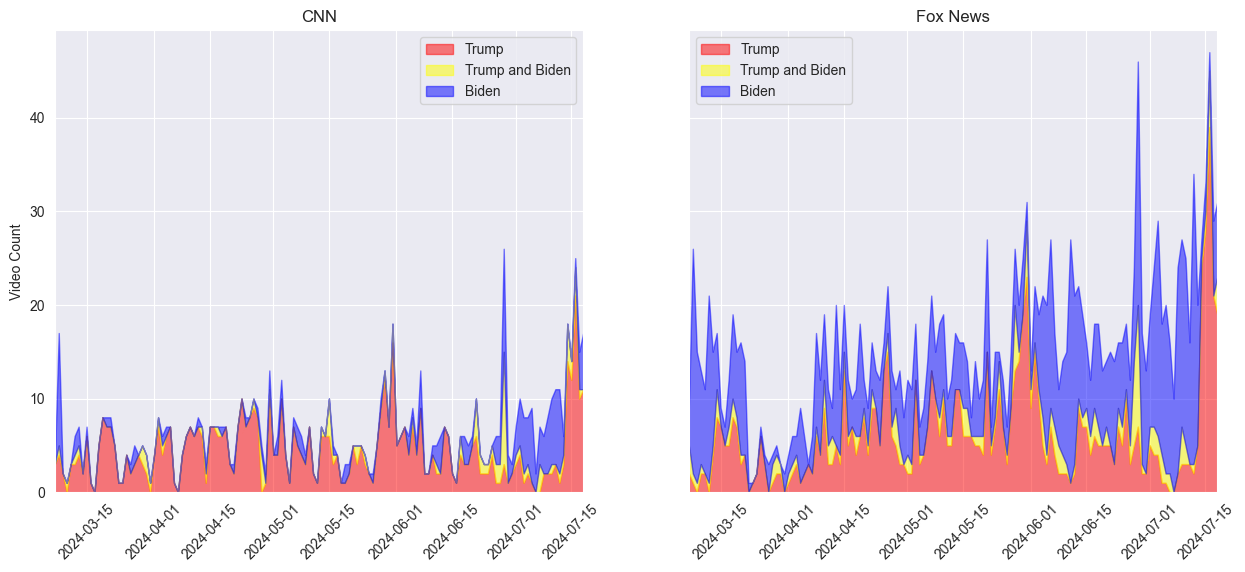

In [60]:
# raw video count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['video_id'].count()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['video_id'].count()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['video_id'].count()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['video_id'].count()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
    
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['video_id'].count()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['video_id'].count()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Video Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
    
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

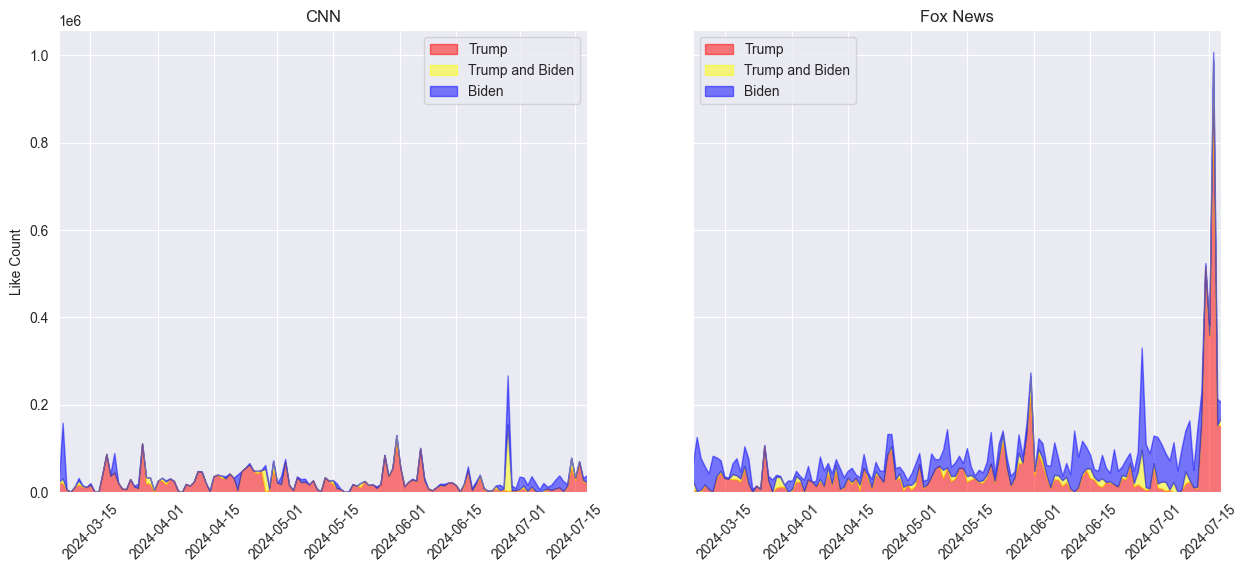

In [61]:
# like count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Like Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

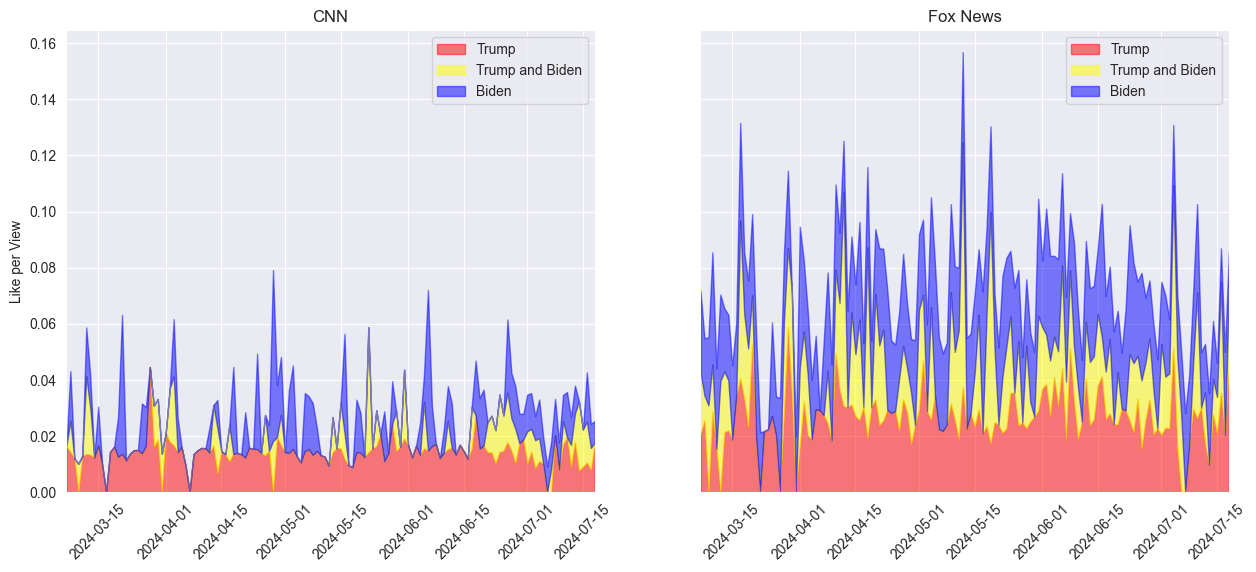

In [62]:
# like per view
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Like per View')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

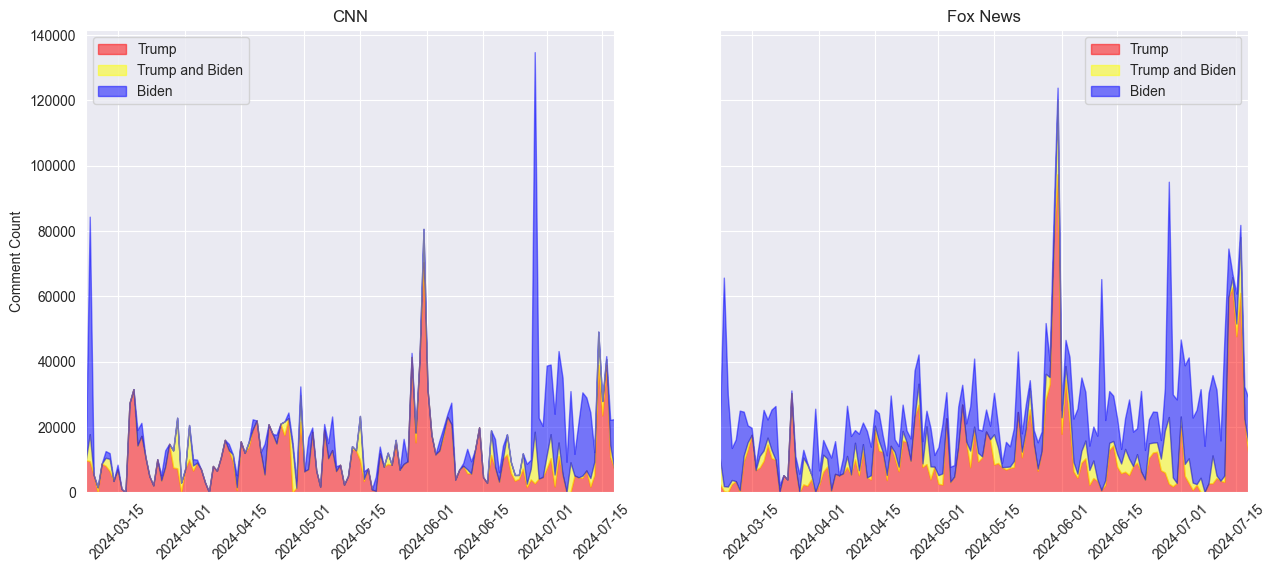

In [63]:
# comment count
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)

ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Comment Count')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

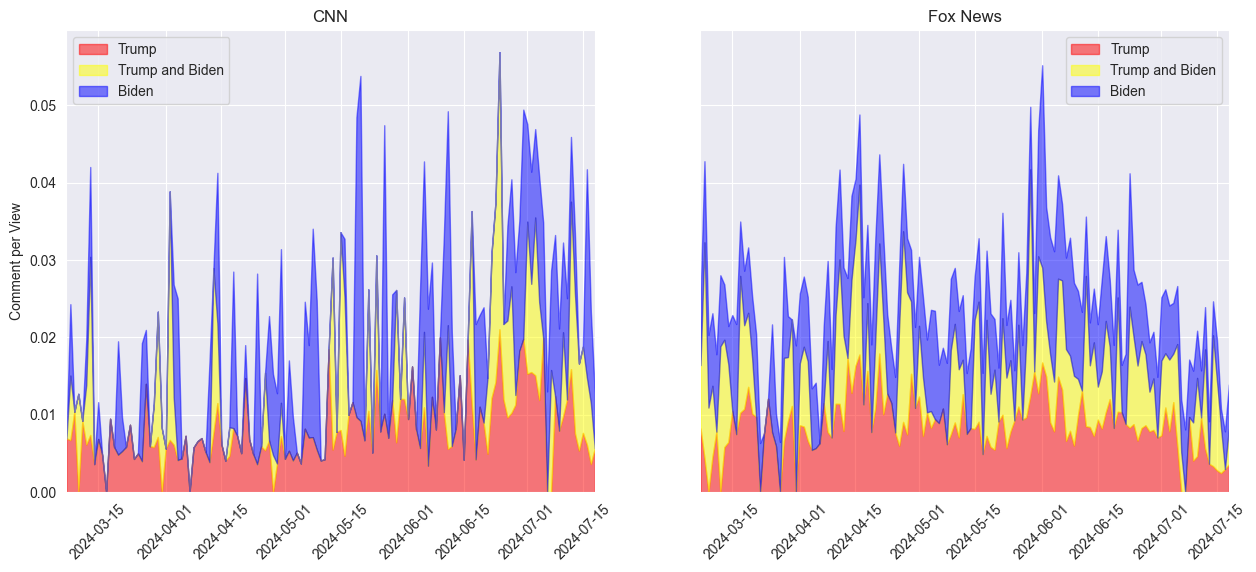

In [64]:
# comment per view
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, sharing y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot view count for CNN on the first subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)
    
ax[0].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[0].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[0].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Plot view count for Fox News on the second subplot, fill each area
# y_1 for only trump, should contain all the dates
y_1 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1 = y_1.reindex(date_range).fillna(0)
# y_2 for trump and biden / only trump
y_2 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2 = y_2.reindex(date_range).fillna(0)
y_2 = y_2.add(y_1, fill_value=0)
# y_3 for trump and biden
y_3 = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum() / cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3 = y_3.reindex(date_range).fillna(0)
y_3 = y_3.add(y_2, fill_value=0)
    
ax[1].fill_between(date_range, y1=y_1, y2=0, color='red', alpha=0.5, label='Trump')
ax[1].fill_between(date_range, y1=y_2, y2=y_1, color='yellow', alpha=0.5, label='Trump and Biden')
ax[1].fill_between(date_range, y1=y_3, y2=y_2, color='blue', alpha=0.5, label='Biden')

# Set title and labels
ax[0].set_title('CNN')
ax[1].set_title('Fox News')
ax[0].set_ylabel('Comment per View')
ax[0].legend()
ax[1].legend()
# Tilt x-axis ticks
for axes in ax:
    axes.tick_params(axis='x', rotation=45)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_xlim(df['Date'].min(), df['Date'].max())
ax[1].set_xlim(df['Date'].min(), df['Date'].max())
plt.show()

In [65]:
# most commented videos
most_commented = cnn_fox.nlargest(10, 'comment_count')
most_commented[['video_title', 'view_count', 'like_count', 'comment_count', 'channel_name', 'appearance']]

,video_title,view_count,like_count,comment_count,channel_name,appearance
16931,See Biden&#39;s fiery speech after shaky debat...,2433178,56731,50293,CNN,1
18278,Shots fired at Trump rally,12103591,110061,37195,Fox News,0
7273,See Biden&#39;s response to Marjorie Taylor Gr...,3674983,63967,34961,CNN,1
16948,The must-watch moments of the CNN Presidential...,5000976,44717,30382,CNN,-1
11503,Robert De Niro spars with bystander during rem...,1549792,61282,27508,CNN,0
8461,Biden decried for proclaiming Transgender Visi...,1181770,18427,24824,Fox News,1
16101,Hear co-author of Ten Commandments bill’s resp...,587546,13728,22518,CNN,-1
16954,&#39;That was painful&#39;: Van Jones reacts t...,1789928,15284,22265,CNN,1
12050,&#39;You&#39;re lying&#39;: George Conway clas...,2130394,45331,20696,CNN,0
12753,Tom Hanks asked if he is worried about another...,6242632,86266,19560,CNN,0


Statistic Analysis

In [66]:
# statistical by date
cnn_fox.groupby('Date').describe()

view_count                                                    \
                count           mean            std      min        25%   
Date                                                                      
2024-03-07       37.0  282303.378378  319860.677936  13329.0   56923.00   
2024-03-08       68.0  276471.058824  487482.854894  15233.0   49848.75   
2024-03-09       40.0  178342.325000  163186.184775  12094.0   64425.00   
2024-03-10       38.0  141068.026316  136963.024602   8025.0   45152.00   
2024-03-11       36.0  244713.638889  222301.448540  15136.0   91129.25   
...               ...            ...            ...      ...        ...   
2024-07-14       64.0  562786.265625  629341.290475  30376.0  127644.75   
2024-07-15       66.0  460305.575758  610489.548328  22371.0  102886.25   
2024-07-16      116.0  356670.517241  456564.687131   5078.0   68952.00   
2024-07-17       74.0  292461.324324  435841.990280   7355.0   65739.25   
2024-07-18       78.0  178794.217949  211505.756180   2983.0   36050.50   

                                           like_count                ...  \
                 50%        75%        max      count          mean  ...   
Date                                                                 ...   
2024-03-07  155108.0  418689.00  1445220.0       37.0   6167.621622  ...   
2024-03-08  120102.5  316744.00  3674983.0       68.0   5381.764706  ...   
2024-03-09  119879.0  250459.00   681005.0       40.0   4096.375000  ...   
2024-03-10   74822.0  205687.00   548959.0       38.0   3620.289474  ...   
2024-03-11  167376.0  312368.75   943510.0       36.0   5169.111111  ...   
...              ...        ...        ...        ...           ...  ...   
2024-07-14  309293.5  858206.75  2856015.0       64.0  12204.765625  ...   
2024-07-15  276173.5  472878.50  3796430.0       66.0   9279.727273  ...   
2024-07-16  140644.5  481191.00  2161035.0      116.0  10584.525862  ...   
2024-07-17  153152.5  301443.50  2850412.0       74.0   5989.148649  ...   
2024-07-18   86835.0  248101.75  1031418.0       78.0   4476.987179  ...   

           comment_count_log            appearance                           \
                         75%        max      count      mean       std  min   
Date                                                                          
2024-03-07          7.901748   8.689128       37.0 -0.405405  0.984871 -1.0   
2024-03-08          7.984061  10.461988       68.0  0.220588  0.990184 -1.0   
2024-03-09          7.755898   8.237215       40.0 -0.175000  1.009887 -1.0   
2024-03-10          7.276867   8.051978       38.0 -0.263158  1.031509 -1.0   
2024-03-11          7.618238   9.082734       36.0 -0.361111  0.866941 -1.0   
...                      ...        ...        ...       ...       ...  ...   
2024-07-14          8.090761   9.385973       64.0 -0.109375  0.799150 -1.0   
2024-07-15          7.757806   9.008591       66.0 -0.121212  0.754783 -1.0   
2024-07-16          7.730248   9.303649      116.0 -0.198276  0.825884 -1.0   
2024-07-17          7.210219   8.846497       74.0 -0.216216  0.763379 -1.0   
2024-07-18          7.092781   8.658345       78.0 -0.102564  0.876678 -1.0   

                                 
            25%  50%   75%  max  
Date                             
2024-03-07 -1.0 -1.0  0.00  2.0  
2024-03-08 -1.0  1.0  1.00  2.0  
2024-03-09 -1.0 -1.0  1.00  2.0  
2024-03-10 -1.0 -1.0  1.00  2.0  
2024-03-11 -1.0 -1.0  0.25  1.0  
...         ...  ...   ...  ...  
2024-07-14 -1.0  0.0  0.00  2.0  
2024-07-15 -1.0  0.0  0.00  2.0  
2024-07-16 -1.0  0.0  0.00  2.0  
2024-07-17 -1.0  0.0  0.00  2.0  
2024-07-18 -1.0  0.0  0.00  2.0  

[134 rows x 56 columns]

# set feature as the video title and channel name, target as the engagement(comment rate)
# calculate the comment rate
df['comment_rate'] = df['comment_count'] / df['view_count']
df['comment_rate'].describe()

# find the outliers
df['comment_rate'].quantile(0.99)
df[df['comment_rate'] > df['comment_rate'].quantile(0.99)]

# vectorize the video title
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the vectorizer
X = vectorizer.fit_transform(df['video_title'])

# Convert the result to a DataFrame
title_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
title_df

# merge the title_df with the original dataframe
df = pd.concat([df, title_df], axis=1)
df

# split the data into training and testing
from sklearn.model_selection import train_test_split

# Define the features and target
features = title_df.columns
target = 'comment_rate'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# train the model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# predict the comment rate
y_pred = model.predict(X_test)
y_pred

# evaluate the model
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Accuracy
print(f"Mean Squared Error: {mse}")

# Calculate the coefficient of determination (r^2)
r2 = model.score(X_test, y_test)
print(f"R^2: {r2}")

# find the most important features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
importances = importances[indices]
features = features[indices]

# Print the feature ranking
print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. feature {features[f]} ({importances[f]})")